In [53]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [54]:
df = pd.read_csv('USA_Housing.csv', delimiter=',')
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [55]:
data = (df.values[:,:-1]).astype(float)
data, data.shape

(array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
         2.30868005e+04, 1.05903356e+06],
        [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
         4.01730722e+04, 1.50589091e+06],
        [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
         3.68821594e+04, 1.05898799e+06],
        ...,
        [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 2.13000000e+00,
         3.32661455e+04, 1.03072958e+06],
        [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
         4.26256202e+04, 1.19865687e+06],
        [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
         4.65012838e+04, 1.29895048e+06]]),
 (5000, 6))

In [56]:
# Calculate covariance matrix
sigma = np.cov(data, rowvar=False) # Feature on row axis => set rowvar = False
sigma, sigma.shape

(array([[ 1.13592777e+08, -2.12059969e+01, -1.18261183e+02,
          2.60282865e+02, -1.71732663e+06,  2.40765379e+09],
        [-2.12059969e+01,  9.82985357e-01, -9.40226613e-03,
          7.52377968e-03, -1.84444655e+02,  1.58435438e+05],
        [-1.18261183e+02, -9.40226613e-03,  1.01170049e+00,
          5.74359913e-01,  2.03657209e+01,  1.19220442e+05],
        [ 2.60282865e+02,  7.52377968e-03,  5.74359913e-01,
          1.52309479e+00, -2.71545071e+02,  7.45520049e+04],
        [-1.71732663e+06, -1.84444655e+02,  2.03657209e+01,
         -2.71545071e+02,  9.85185302e+07,  1.43195649e+09],
        [ 2.40765379e+09,  1.58435438e+05,  1.19220442e+05,
          7.45520049e+04,  1.43195649e+09,  1.24692058e+11]]),
 (6, 6))

In [57]:
# Apply SVD on covariance matrix sigma
P, D, Pt = np.linalg.svd(sigma)
print('P =', P, '\n')
print('D =', D, '\n')
print('Pt =', Pt)

P = [[-1.93116080e-02  6.13514353e-01  7.89447397e-01 -2.72527706e-05
   1.87184137e-05 -8.25932440e-05]
 [-1.26963165e-06 -2.93438847e-06 -8.27424761e-05  2.93428522e-01
   5.44430809e-01 -7.85808368e-01]
 [-9.55378801e-07 -4.00465138e-06 -6.18815007e-05 -4.57537821e-01
  -6.41754770e-01 -6.15475388e-01]
 [-5.97451679e-07  1.59085439e-06 -3.66746802e-05 -8.39380035e-01
   5.40135084e-01  6.07885365e-02]
 [-1.14840533e-02 -7.89678676e-01  6.13413157e-01 -2.16389021e-05
   1.68655721e-05 -5.80177749e-05]
 [-9.99747557e-01 -2.77993843e-03 -2.22955962e-02  1.34120051e-06
  -9.56221481e-07  3.81163088e-06]] 

D = [1.24755014e+11 1.04893725e+08 4.42613588e+07 1.71587040e+00
 7.16818807e-01 1.90687645e-01] 

Pt = [[-1.93116080e-02 -1.26963165e-06 -9.55378801e-07 -5.97451679e-07
  -1.14840533e-02 -9.99747557e-01]
 [ 6.13514353e-01 -2.93438849e-06 -4.00465138e-06  1.59085439e-06
  -7.89678676e-01 -2.77993843e-03]
 [ 7.89447397e-01 -8.27424761e-05 -6.18815007e-05 -3.66746802e-05
   6.13413157e-

In [58]:
# Choose k = 2
k = 2
inflection_point = np.sum(D[:k])/np.sum(D[:])
inflection_point

0.9996456374385339

In [59]:
# New subspaces
Pk = P[:k]
Pk, Pk.shape

(array([[-1.93116080e-02,  6.13514353e-01,  7.89447397e-01,
         -2.72527706e-05,  1.87184137e-05, -8.25932440e-05],
        [-1.26963165e-06, -2.93438847e-06, -8.27424761e-05,
          2.93428522e-01,  5.44430809e-01, -7.85808368e-01]]),
 (2, 6))

In [76]:
# First PC and second PC
Pk[0]
# => Feature 2 and 3 is the most significant features on the first PC

array([-1.93116080e-02,  6.13514353e-01,  7.89447397e-01, -2.72527706e-05,
        1.87184137e-05, -8.25932440e-05])

In [79]:
# Project old data into new subspaces
new_data = np.dot(data, np.abs(Pk.T))
new_data, new_data.shape

(array([[   1633.07189033,  844767.898449  ],
        [   1664.54368518, 1205214.14752865],
        [   1282.02674128,  852242.98967497],
        ...,
        [   1318.1718412 ,  828067.75149547],
        [   1422.0383418 ,  965122.98417942],
        [   1382.30830574, 1046044.16595249]]),
 (5000, 2))

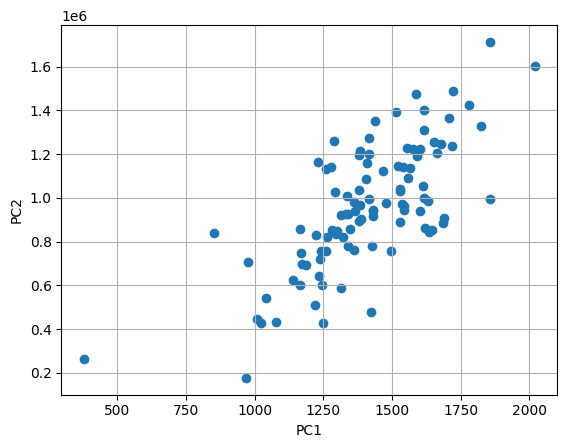

In [81]:
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()

plt.scatter(new_data[:100, 0:1], new_data[:100, 1:2])
plt.show()